**Download datasets**

In [0]:
# download a positive dataset
!mkdir -p /content/data/
!wget --no-check-certificate \
  https://www.dropbox.com/s/e2xya1pzr2tm9xr/QUT_fish_data.zip\
  -O /content/data/QUT_fish_data.zip

--2019-11-13 07:58:01--  https://www.dropbox.com/s/e2xya1pzr2tm9xr/QUT_fish_data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/e2xya1pzr2tm9xr/QUT_fish_data.zip [following]
--2019-11-13 07:58:01--  https://www.dropbox.com/s/raw/e2xya1pzr2tm9xr/QUT_fish_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5b2d9c4fe2bb637882bf1aa8f9.dl.dropboxusercontent.com/cd/0/inline/AsRYH794ySnZRRv_nloWKD7QDm_rWII23ycO8kXpXE3y5SgZZC3eojk8dZq5K1OeNh4vGrO5Ui7TTslCTdUU1xQUniqpEmzja2NDcSDFOtkFWA/file# [following]
--2019-11-13 07:58:02--  https://uc5b2d9c4fe2bb637882bf1aa8f9.dl.dropboxusercontent.com/cd/0/inline/AsRYH794ySnZRRv_nloWKD7QDm_rWII23ycO8kXpXE3y5SgZZC3eojk8dZq5K1OeNh4vGrO5Ui7TTslCTdUU1xQUniqpEmzja2NDcSDFOtkFWA/file
R

In [0]:
# download a negative dataset
!wget --no-check-certificate \
  https://www.dropbox.com/s/p2a4rwv9x8cf78a/not_fish_data.zip?dl= \
  -O /content/data/not_fish_data.zip

--2019-11-13 07:59:03--  https://www.dropbox.com/s/p2a4rwv9x8cf78a/not_fish_data.zip?dl=
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/p2a4rwv9x8cf78a/not_fish_data.zip [following]
--2019-11-13 07:59:03--  https://www.dropbox.com/s/raw/p2a4rwv9x8cf78a/not_fish_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8b60d3aafb34c2d7f6250ac768.dl.dropboxusercontent.com/cd/0/inline/AsRd32A3E1K6Ijl3YrwuLJ3N3X6dO4gHZrgOfoG4OyvRgNS5BfJHvcgNIyBCHpd9ZTEWTouMQi5C0hAiCAUzF8F_UtFAFxj3CRAaPMF4ehwZG9g6RToJjR666WQ4NajWTrc/file# [following]
--2019-11-13 07:59:04--  https://uc8b60d3aafb34c2d7f6250ac768.dl.dropboxusercontent.com/cd/0/inline/AsRd32A3E1K6Ijl3YrwuLJ3N3X6dO4gHZrgOfoG4OyvRgNS5BfJHvcgNIyBCHpd9ZTEWTouMQi5C0hAiCAUzF8F_UtFA

**Import necessary libraries** 

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import os
import zipfile
import numpy as np
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.



**Extract negative data from Zip file**

In [0]:
import random
from shutil import copyfile

# The following python code will use the OS library to use Operating System libraries
# and giving  access to the file system, and the zipfile library allowing to unzip the data.

local_zip = '/content/data/QUT_fish_data.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data/')
zip_ref.close()

# Use os.mkdir to create your directories

try:
    os.mkdir('/content/data/images')
    os.mkdir('/content/data/images/training')
    os.mkdir('/content/data/images/testing')
    os.mkdir('/content/data/images/training/pos')
    os.mkdir('/content/data/images/testing/pos')
except OSError:
    pass

# a python function called split_data which takes:
# 1- a SOURCE directory containing the files
# 2- a TRAINING directory that a portion of the files will be copied to
# 3- a TESTING directory that a portion of the files will be copie to
# 4- a SPLIT SIZE to determine the portion
#  the training set is a random X% of the files, and the test set is the remaining files
#  All images will be checked, and if they have a zero file length,
# they will not be copied over

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


FISH_SOURCE_DIR = "/content/data/QUT_fish_data/images/raw_images/"
TRAINING_FISH_DIR = "/content/data/images/training/pos/"
TESTING_FISH_DIR = "/content/data/images/testing/pos/"

split_size = .7

#split dataset to Training, Testing

split_data(FISH_SOURCE_DIR, TRAINING_FISH_DIR, TESTING_FISH_DIR, split_size)

print(len(os.listdir('/content/data/images/training/pos/')))
print(len(os.listdir('/content/data/images/testing/pos/')))

3084
1322


**Extract negative data from Zip file**

In [0]:
#Same thing for negative data
local_zip = '/content/data/not_fish_data.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data/')
zip_ref.close()

try:
    os.mkdir('/content/data/images/training/neg')
    os.mkdir('/content/data/images/testing/neg')
except OSError:
    pass

NoFISH_SOURCE_DIR = "/content/data/not_fish/"
TRAINING_NoFISH_DIR = "/content/data/images/training/neg/"
TESTING_NoFISH_DIR = "/content/data/images/testing/neg/"

split_size = .7
split_data(NoFISH_SOURCE_DIR, TRAINING_NoFISH_DIR, TESTING_NoFISH_DIR, split_size)

print(len(os.listdir('/content/data/images/training/neg/')))
print(len(os.listdir('/content/data/images/testing/neg/')))

2795
1198


**Build the model**

**A ResNet model to detect fishes**

In [0]:
tf.keras.backend.clear_session()

# Transfer learning , using ResNet pre-trained model with ImageNet weights
# don't include the top layres (dense layers) because it used for classify 6000 class on imagenet data set
# input will take 256x256 RGB images (3 channels)

base_model = tf.keras.applications.resnet_v2.ResNet50V2(include_top=False, weights='imagenet', input_shape=(256,256,3), pooling=None )

# add new layers for fish detection 
# GlobalAveragePooling2D will average the output of ResNet and provide 1D Tesnor
# (8, 8, 2048) -> (2048)
x = layers.GlobalAveragePooling2D()(base_model.output)

# Add a fully connected layer with 1,024 hidden units and ReLU activation 
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.3
# dropout to avoid overfitting 
x = layers.Dropout(0.3)(x)

# Add a final sigmoid layer for classification
# output layer has only one neuron 
# because it's binary classification problem
# Fish / Non fish
x = layers.Dense  (1, activation='sigmoid')(x)


model = Model(base_model.input, x)

# RMSprop oprimizer will dapt the learning rate also
# binary_crossentropy loss function 
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 130, 130, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

**Data Augmentation**

In [0]:
# Add data-augmentation parameters to ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=180,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.2,
      zoom_range=-0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

# the validation data should not be augmented
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 28 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/data/images/training/',  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 256x256
        batch_size=28,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/data/images/testing',  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 256x256
        batch_size=24,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 5878 images belonging to 2 classes.
Found 2520 images belonging to 2 classes.


**Train the model**

In [0]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

# start training using augmented images for 10 epochs

history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 10,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/10
Epoch 1/10
100/100 - 107s - loss: 0.0521 - acc: 0.9786 - val_loss: 0.6087 - val_acc: 0.8925
Epoch 2/10
Epoch 1/10
100/100 - 86s - loss: 0.0610 - acc: 0.9843 - val_loss: 0.0222 - val_acc: 0.9967
Epoch 3/10
Epoch 1/10
100/100 - 87s - loss: 0.0361 - acc: 0.9911 - val_loss: 0.3094 - val_acc: 0.9642
Epoch 4/10
Epoch 1/10
100/100 - 87s - loss: 0.0266 - acc: 0.9904 - val_loss: 0.0271 - val_acc: 0.9958
Epoch 5/10
Epoch 1/10
100/100 - 88s - loss: 0.0250 - acc: 0.9914 - val_loss: 0.0163 - val_acc: 0.9942
Epoch 6/10
Epoch 1/10
100/100 - 87s - loss: 0.0255 - acc: 0.9925 - val_loss: 0.0319 - val_acc: 0.9967
Epoch 7/10
Epoch 1/10
100/100 - 87s - loss: 0.0281 - acc: 0.9929 - val_loss: 0.1733 - val_acc: 0.9783
Epoch 8/10
Epoch 1/10
100/100 - 87s - loss: 0.0427 - acc: 0.9911 - val_loss: 0.9520 - val_acc: 0.9758
Epoch 9/10
Epoch 1/10
100/100 - 88s - loss: 0.0354 - acc: 0.9911 - val_loss: 0.0657 - val_acc: 0.9925
Epoch 10/10
Epoch 1/10
100/100 - 87s - loss: 0.0243 - acc: 0.9939 - val_loss: 0.1

**Plot accuracy chart**

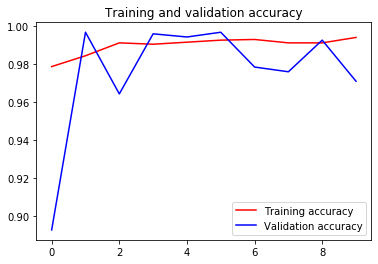

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

# Retrieve a of list results on training and test data
# sets for each training epoch

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

**Test the model**

for images that not exsit in the dataset

In [0]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(256, 256))
  
  x=image.img_to_array(img)/255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes)

  if classes>0.5:
    print(fn + " ther is a fish")
    
  else:
    print(fn + " ther is no fish")
 

Saving f1.jpg to f1.jpg
Saving f2.jpg to f2.jpg
Saving f3.jpg to f3.jpg
Saving f4.jpg to f4.jpg
Saving f5.jpg to f5.jpg
Saving f6.jpg to f6.jpg
Saving f7.jpg to f7.jpg
Saving f8.jpg to f8.jpg
Saving f9.jpg to f9.jpg
Saving f10.jpg to f10.jpg
Saving f11.jpg to f11.jpg
Saving f12.jpg to f12.jpg
Saving f13.jpg to f13.jpg
Saving f14.jpg to f14.jpg
Saving f15.jpg to f15.jpg
Saving f16.jpg to f16.jpg
Saving f17.jpg to f17.jpg
Saving f18.jpg to f18.jpg
Saving nf1.jpg to nf1.jpg
Saving nf2.jpg to nf2.jpg
Saving nf3.jpg to nf3.jpg
Saving nf4.jpg to nf4.jpg
Saving nf5.jpg to nf5.jpg
Saving nf6.jpg to nf6.jpg
Saving nf7.jpg to nf7.jpg
Saving nf8.jpg to nf8.jpg
Saving nf9.jpg to nf9.jpg
Saving nf10.jpg to nf10.jpg
Saving nf11.jpg to nf11.jpg
Saving nf12.JPG to nf12.JPG
[[1.]]
f1.jpg ther is a fish
[[1.]]
f2.jpg ther is a fish
[[1.]]
f3.jpg ther is a fish
[[1.]]
f4.jpg ther is a fish
[[1.]]
f5.jpg ther is a fish
[[1.]]
f6.jpg ther is a fish
[[0.16775833]]
f7.jpg ther is no fish
[[1.]]
f8.jpg ther i

In [0]:
model.save_weights('/content/data/weights_ImgNet_init.h5')

/content/nf7.jpg


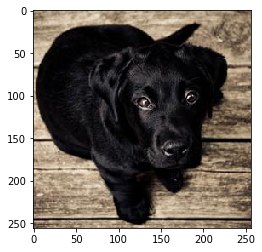

/content/nf3.jpg


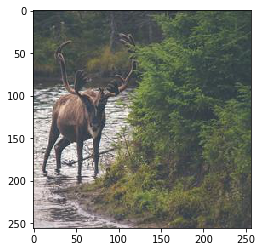

/content/f5.jpg


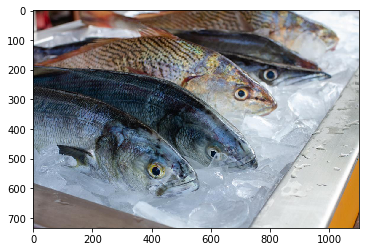

/content/f6.jpg


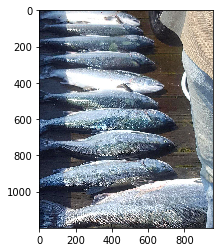

/content/nf5.jpg


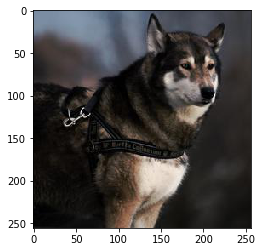

/content/f2.jpg


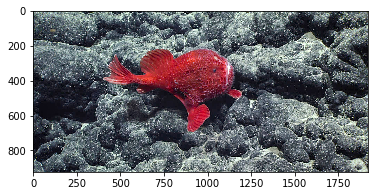

/content/nf6.jpg


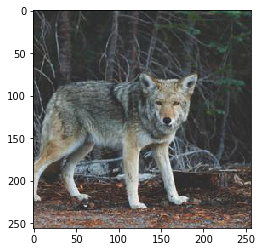

/content/f4.jpg


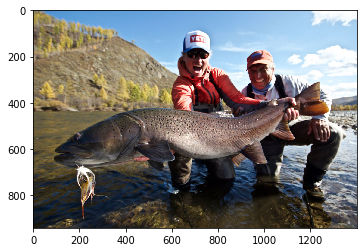

/content/nf1.jpg


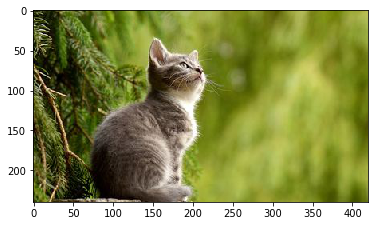

/content/nf2.jpg


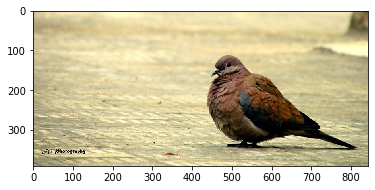

/content/f11.jpg


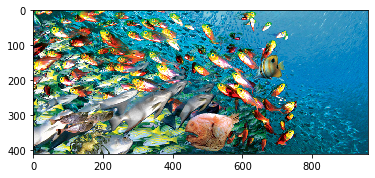

/content/nf4.jpg


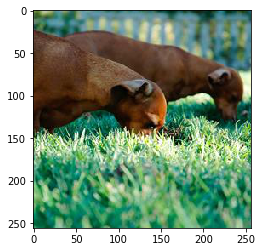

/content/f13.jpg


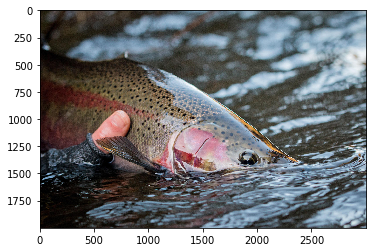

/content/f10.jpg


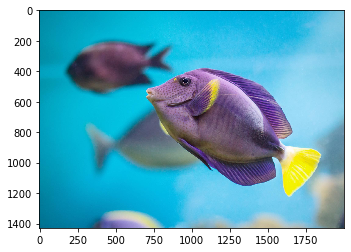

/content/f15.jpg


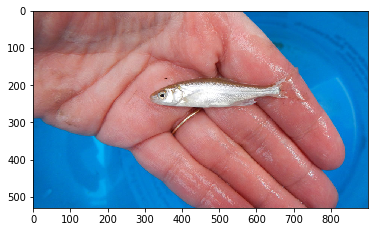

/content/f16.jpg


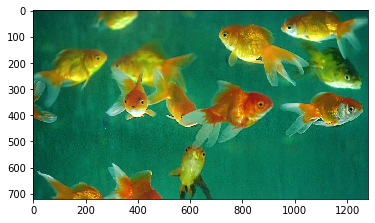

/content/nf8.jpg


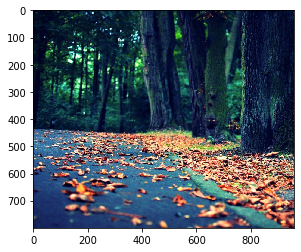

/content/f14.jpg


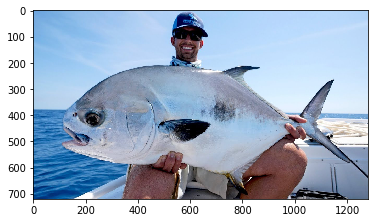

/content/f8.jpg


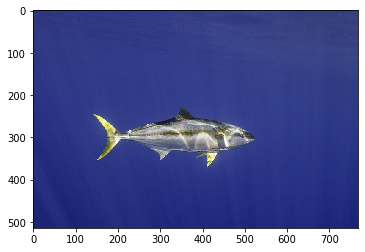

/content/f12.jpg


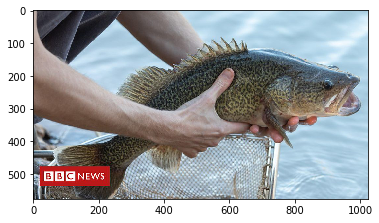

/content/f18.jpg


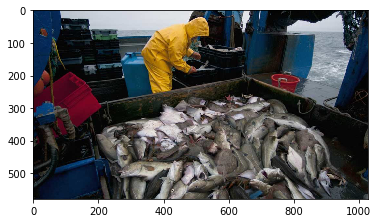

/content/f3.jpg


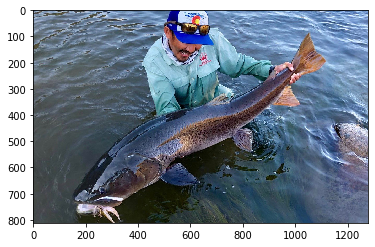

/content/nf11.jpg


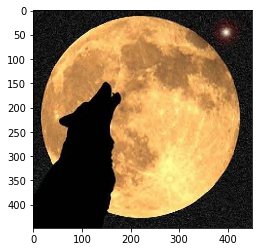

/content/f17.jpg


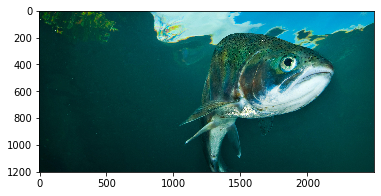

/content/f1.jpg


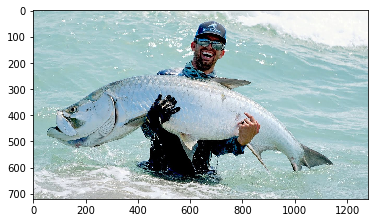

/content/f9.jpg


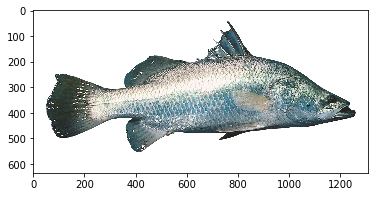

/content/f7.jpg


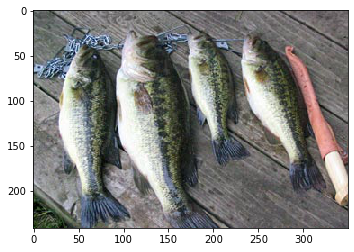

/content/nf9.jpg


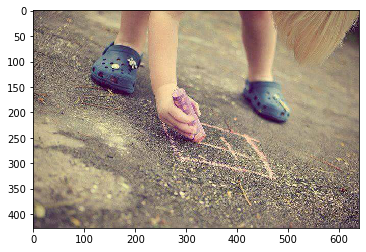

/content/nf10.jpg


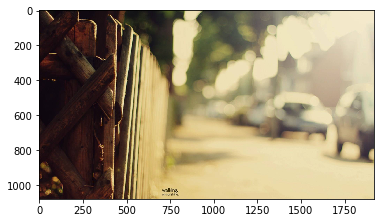

In [0]:
from PIL import Image
import glob
for filename in glob.glob('/content/*.jpg'): 
    im=Image.open(filename)
    print(filename)
    plt.imshow(im)
    plt.show()
    
